# Path Finder: What are the potential paths between two nodes?
## This pipeline can be used to get a ranked path between A and B given a set of paths.

![image.png](attachment:3da53daa-b927-420f-8b64-97ee4046cc60.png)

Example questions: 

What drugs may treat ovarian cancer (MONDO:0008170) patients with BRCA1 mutation?  

What is the mechanism of Olaparib being effective for patients with BRCA1 mutation?


In [1]:
# include path ../src in order to import modules
import sys
sys.path.append('../src')
import TCT as TCT
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Step1: List all the APIs in the translator system
APInames = TCT.list_Translator_APIs()
print(len(APInames))
#print(APInames.keys())

98


In [3]:
# Step 2: Get metaKG and all predicates from Translator APIs
metaKG = TCT.get_KP_metadata(APInames) # This only applies to the Translator APIs
#print(metaKG.columns)
#print(metaKG.shape)

metaKG.to_csv('../metaData/metaKG.csv', index=False)
metaKG = pd.read_csv('../metaData/metaKG.csv')
All_predicates = list(set(metaKG['KG_category']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))

In [4]:
# Step 3: set input parameters

# Node1 for query
input_node1 = 'BRCA2'
input_node1_id = TCT.get_curie(input_node1)
print(input_node1_id)
input_node1_list = [input_node1_id]
input_node1_category = ['biolink:Gene'] # Node: this has to be in a format of biolink:xxx

#Node2 for query
input_node2_list = []
#input_node2_category = ['biolink:Drug','biolink:SmallMolecule'] # Node: this has to be in a format of biolink:xxx
input_node2_category = ['biolink:Gene','biolink:Protein']

# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates = list(set(TCT.select_concept(sub_list=input_node1_category,obj_list=input_node2_category,metaKG=metaKG)))
print("all relevant predicates in Translator:")
print(sele_predicates)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_1 = TCT.select_API(sub_list=input_node1_category,obj_list=input_node2_category,metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_1)

# get API URLs
API_URLs_1 = TCT.get_Translator_API_URL(sele_APIs_1, APInames)

#-----------------#

# Node3 for query
#input_node3 = 'ovarian cancer'
input_node3 = 'Olaparib'
input_node3_id = TCT.get_curie(input_node3)
#input_node3_id = "MONDO:0008170"
print(input_node3_id)
#input_node1_id= "MONDO:0008170"
input_node3_list = [input_node3_id]
input_node3_category = ['biolink:SmallMolecule', 'biolink:Drug','biolink:ChemicalSubstance'] # Node: this has to be in a format of biolink:xxx


# Get all predicates for the input node1 and node2, user can furter select the predicates among this list
sele_predicates_2 = list(set(TCT.select_concept(sub_list=input_node3_category,obj_list=input_node2_category,metaKG=metaKG)))
print("all relevant predicates in Translator:")
print(sele_predicates_2)
# select predicates

# Get all APIs for the input node1 and node2, user can furter select the APIs among this list
sele_APIs_2 = TCT.select_API(sub_list=input_node3_category,obj_list=input_node2_category,metaKG=metaKG)
print("all relevant APIs in Translator:")
print(sele_APIs_2)

# get API URLs
API_URLs_2 = TCT.get_Translator_API_URL(sele_APIs_2, 
                                      APInames)

NCBIGene:675
all relevant predicates in Translator:
['biolink:genetically_interacts_with', 'biolink:negatively_correlated_with', 'biolink:has_input', 'biolink:regulated_by', 'biolink:directly_physically_interacts_with', 'biolink:affected_by', 'biolink:affects', 'biolink:subclass_of', 'biolink:homologous_to', 'biolink:derives_into', 'biolink:has_part', 'biolink:derives_from', 'biolink:causes', 'biolink:physically_interacts_with', 'biolink:binds', 'biolink:regulates', 'biolink:close_match', 'biolink:related_to', 'biolink:contributes_to', 'biolink:biomarker_for', 'biolink:correlated_with', 'biolink:part_of', 'biolink:has_gene_product', 'biolink:has_phenotype', 'biolink:positively_correlated_with', 'biolink:genetically_associated_with', 'biolink:orthologous_to', 'biolink:genetic_association', 'biolink:interacts_with', 'biolink:produced_by', 'biolink:coexists_with', 'biolink:gene_product_of', 'biolink:coexpressed_with', 'biolink:produces']
all relevant APIs in Translator:
['Multiomics BigGI

In [5]:
input_node3_id

'PUBCHEM.COMPOUND:23725625'

In [6]:
# Step 4: Format query json
query_json = TCT.format_query_json(input_node1_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node1_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates) # a list of predicates
# Step 5: Query Translator APIs and parse results
result = TCT.parallel_api_query(API_URLs_1,query_json=query_json, max_workers=len(API_URLs_1))
# Step 6: Parse results
result_parsed = TCT.parse_KG(result)
# Step 7: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores = TCT.rank_by_primary_infores(result_parsed, input_node1_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Warning Code:404:https://api.bte.ncats.io/v1/bde72db681ec0b8f9eeb67bb6b8dd72c/query
Warning Code:404:https://automat.renci.org/biolink/1.4/query
Warning Code:400:https://ars-prod.transltr.io/ara-robokop/api/runquery
Success!https://automat.renci.org/icees-kg/1.4/query
Success!https://automat.renci.org/panther/1.4/querySuccess!https://automat.transltr.io/genome-alliance/1.4/query

Success!https://automat.renci.org/hmdb/1.4/querySuccess!https://automat

UniProtKB:P42771-4no preferred name


<AxesSubplot:title={'center':'Ranking of one-hop nodes by predicate'}, ylabel='Predicate'>

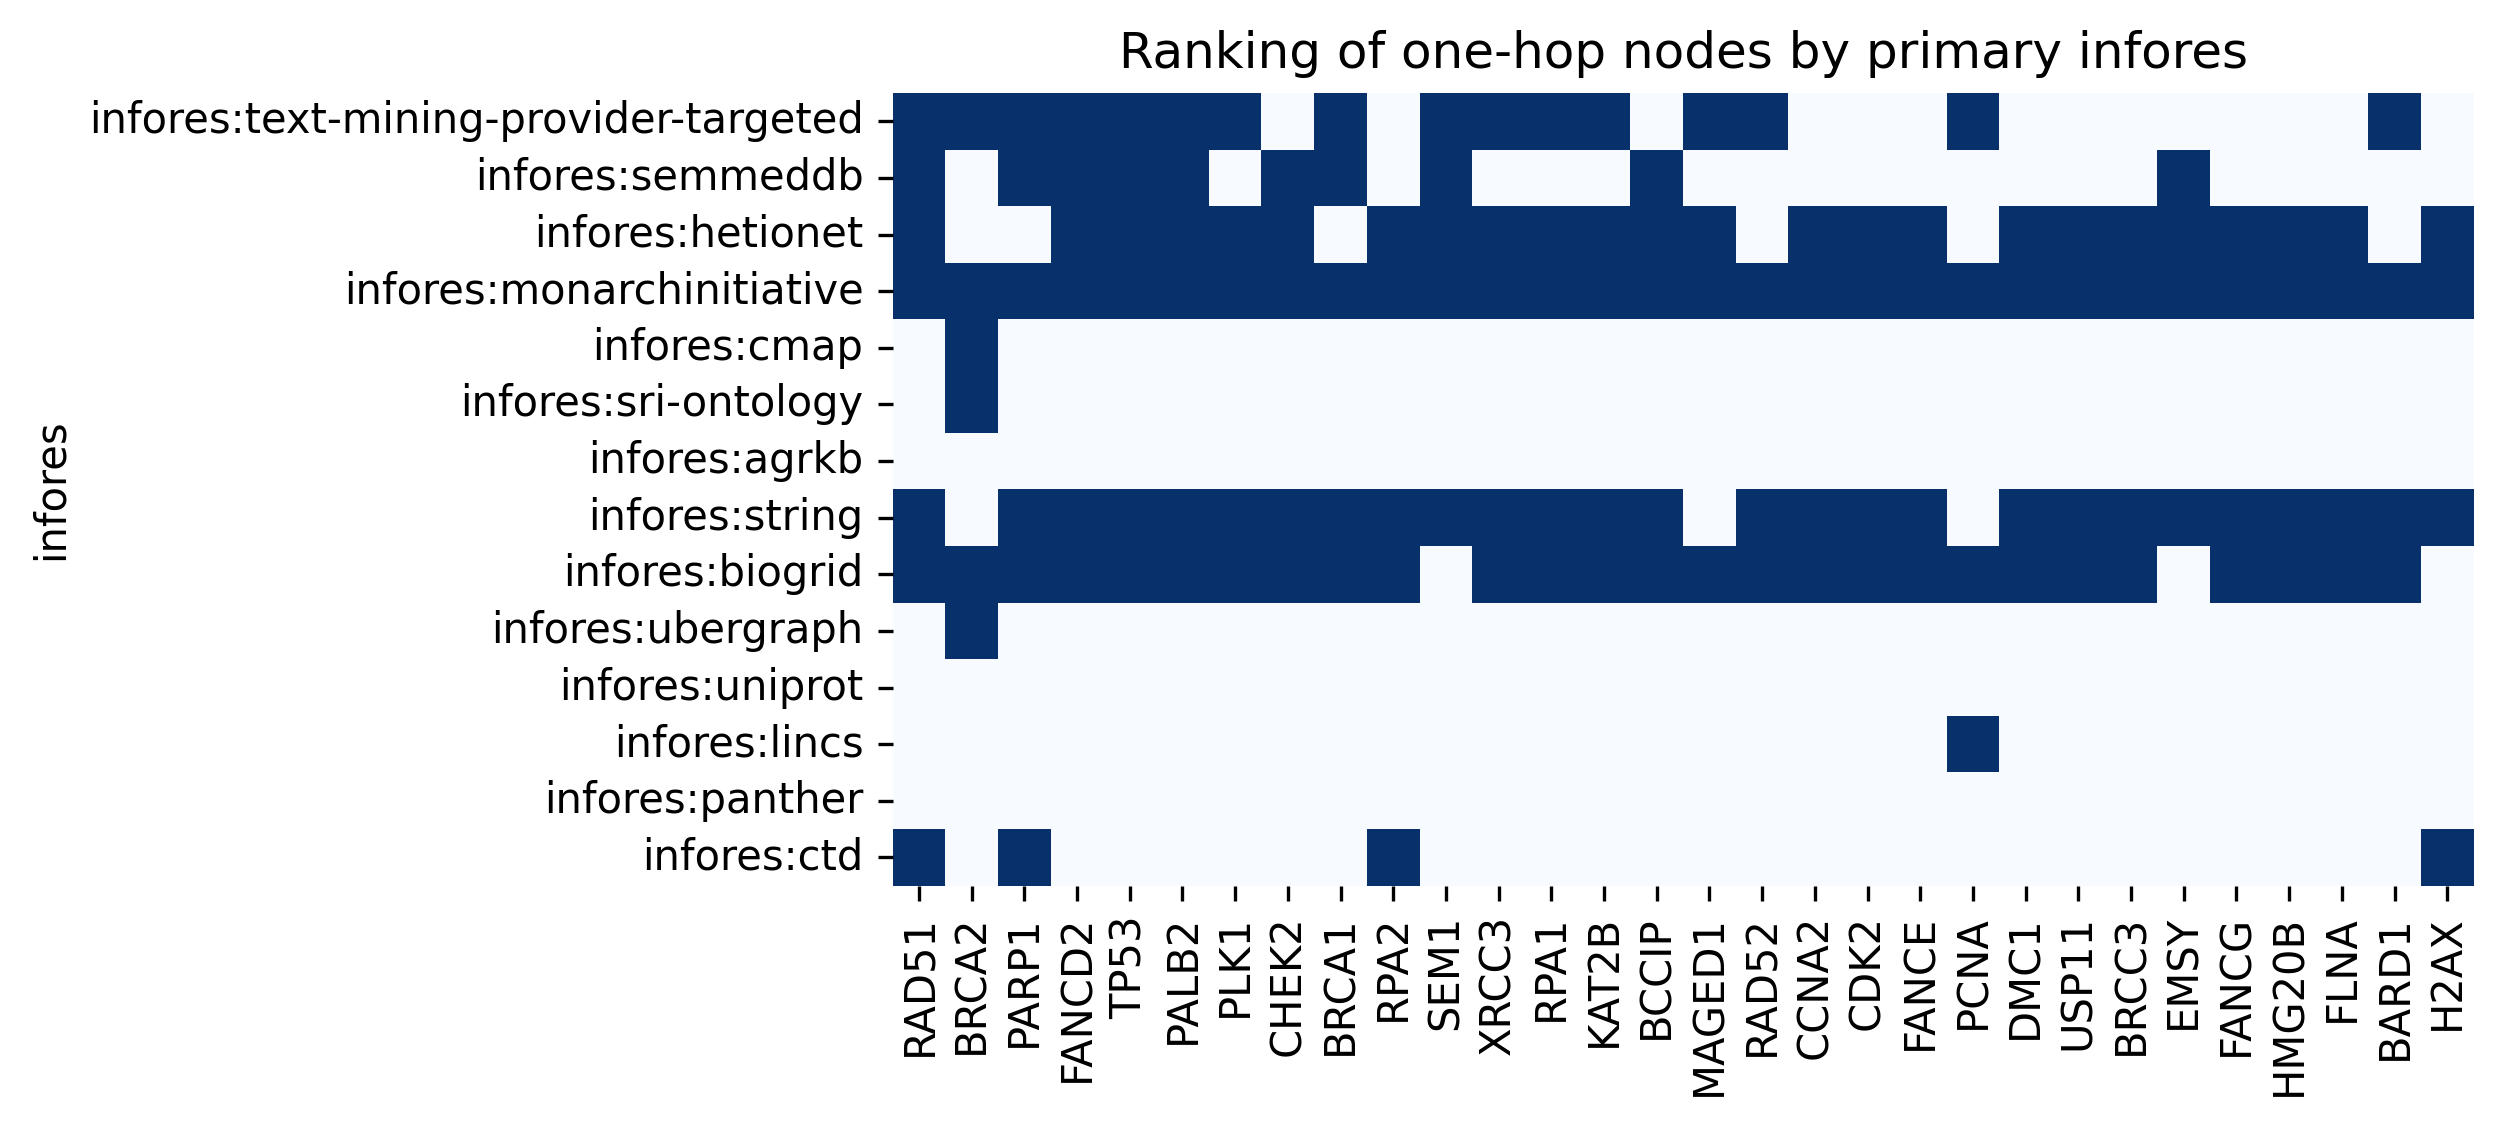

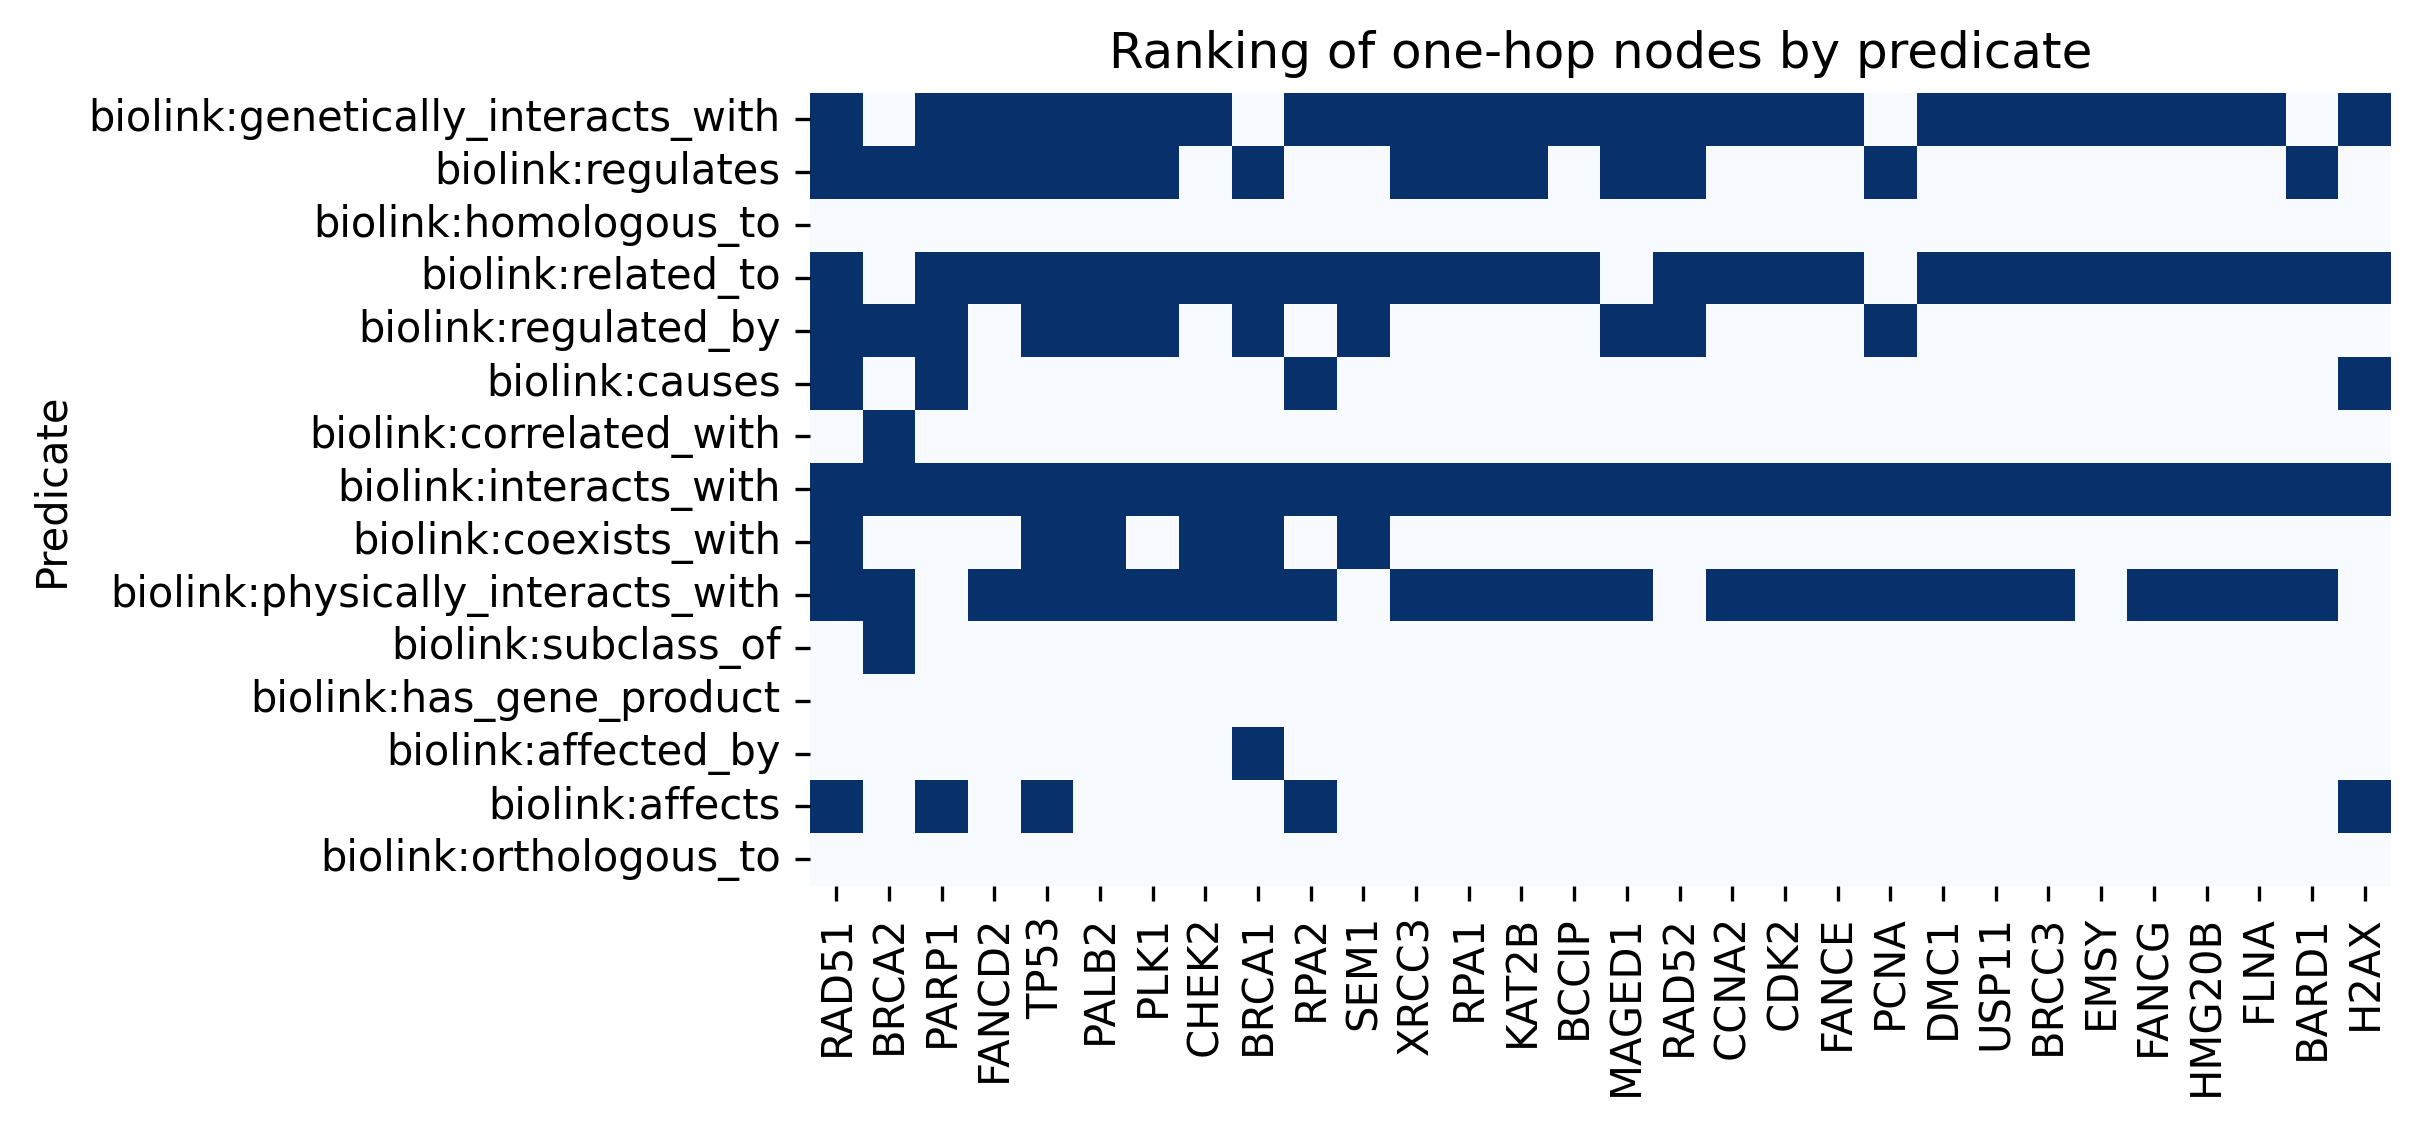

In [7]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, 
                                 result_parsed, 
                                 num_of_nodes = 30, 
                                 input_query = input_node1_id,
                                 fontsize = 10,
                                 title_fontsize=12)

In [8]:
# Step 9: Format query json
query_json2 = TCT.format_query_json(input_node3_list,  # a list of identifiers for input node1
                                   input_node2_list,  # it can be empty list if only want to query node1
                                   input_node3_category,  # a list of categories of input node1
                                   input_node2_category,  # a list of categories of input node2
                                   sele_predicates_2) # a list of predicates


In [9]:
# Step 10: Query Translator APIs and parse results
result2 = TCT.parallel_api_query(API_URLs_2,query_json=query_json2, max_workers=len(API_URLs_2))

# Step 11: Parse results
result_parsed2 = TCT.parse_KG(result2)

# Step 12: Ranking the results. This ranking method is based on the number of unique primary infores. It can only be used to rank the results with one defined node.
result_ranked_by_primary_infores2 = TCT.rank_by_primary_infores(result_parsed2, input_node3_id)   # input_node1_id is the curie id of the input node, such as "NCBIGene:672"


'https://automat.ci.renci.org/drugcentral/1.4/query' generated an exception: HTTPSConnectionPool(host='automat.ci.renci.org', port=443): Max retries exceeded with url: /drugcentral/1.4/query (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x14cfd5870>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
'' generated an exception: Invalid URL '': No scheme supplied. Perhaps you meant https://?
Warning Code:404:https://api.bte.ncats.io/v1/8f08d1446e0bb9c2b323713ce83e2bd3/query
Warning Code:404:https://api.bte.ncats.io/v1/bde72db681ec0b8f9eeb67bb6b8dd72c/query
Warning Code:404:https://automat.renci.org/biolink/1.4/query
Warning Code:400:https://ars-prod.transltr.io/ara-robokop/api/runquery
Warning Code:404:https://automat.ci.transltr.io/u

CHEMBL.TARGET:CHEMBL3105:no preferred name
CHEMBL.TARGET:CHEMBL5366:no preferred name
CHEMBL.TARGET:CHEMBL6154:no preferred name
CHEMBL.TARGET:CHEMBL5083:no preferred name
CHEMBL.TARGET:CHEMBL6164:no preferred name
CHEMBL.TARGET:CHEMBL6142:no preferred name
CHEMBL.TARGET:CHEMBL2429708:no preferred name
CHEMBL.TARGET:CHEMBL2380187:no preferred name
CHEMBL.TARGET:CHEMBL4105981:no preferred name
UniProtKB:Q9BXH1-2:no preferred name
CHEMBL.TARGET:CHEMBL2321638:no preferred name
UniProtKB:Q9UGN5-1:no preferred name
CHEMBL.TARGET:CHEMBL5393:no preferred name
CHEMBL.TARGET:CHEMBL6030:no preferred name
CHEMBL.TARGET:CHEMBL4005:no preferred name
CHEMBL.TARGET:CHEMBL3253:no preferred name
CHEMBL.TARGET:CHEMBL4302:no preferred name
CHEMBL.TARGET:CHEMBL340:no preferred name
CHEMBL.TARGET:CHEMBL4523582:no preferred name
CHEMBL.TARGET:CHEMBL3740:no preferred name
CHEMBL.TARGET:CHEMBL4729:no preferred name
CHEMBL.TARGET:CHEMBL3019:no preferred name
CHEMBL.TARGET:CHEMBL2380189:no preferred name
CHEMBL

<AxesSubplot:title={'center':'Ranking of one-hop nodes by predicate'}, ylabel='Predicate'>

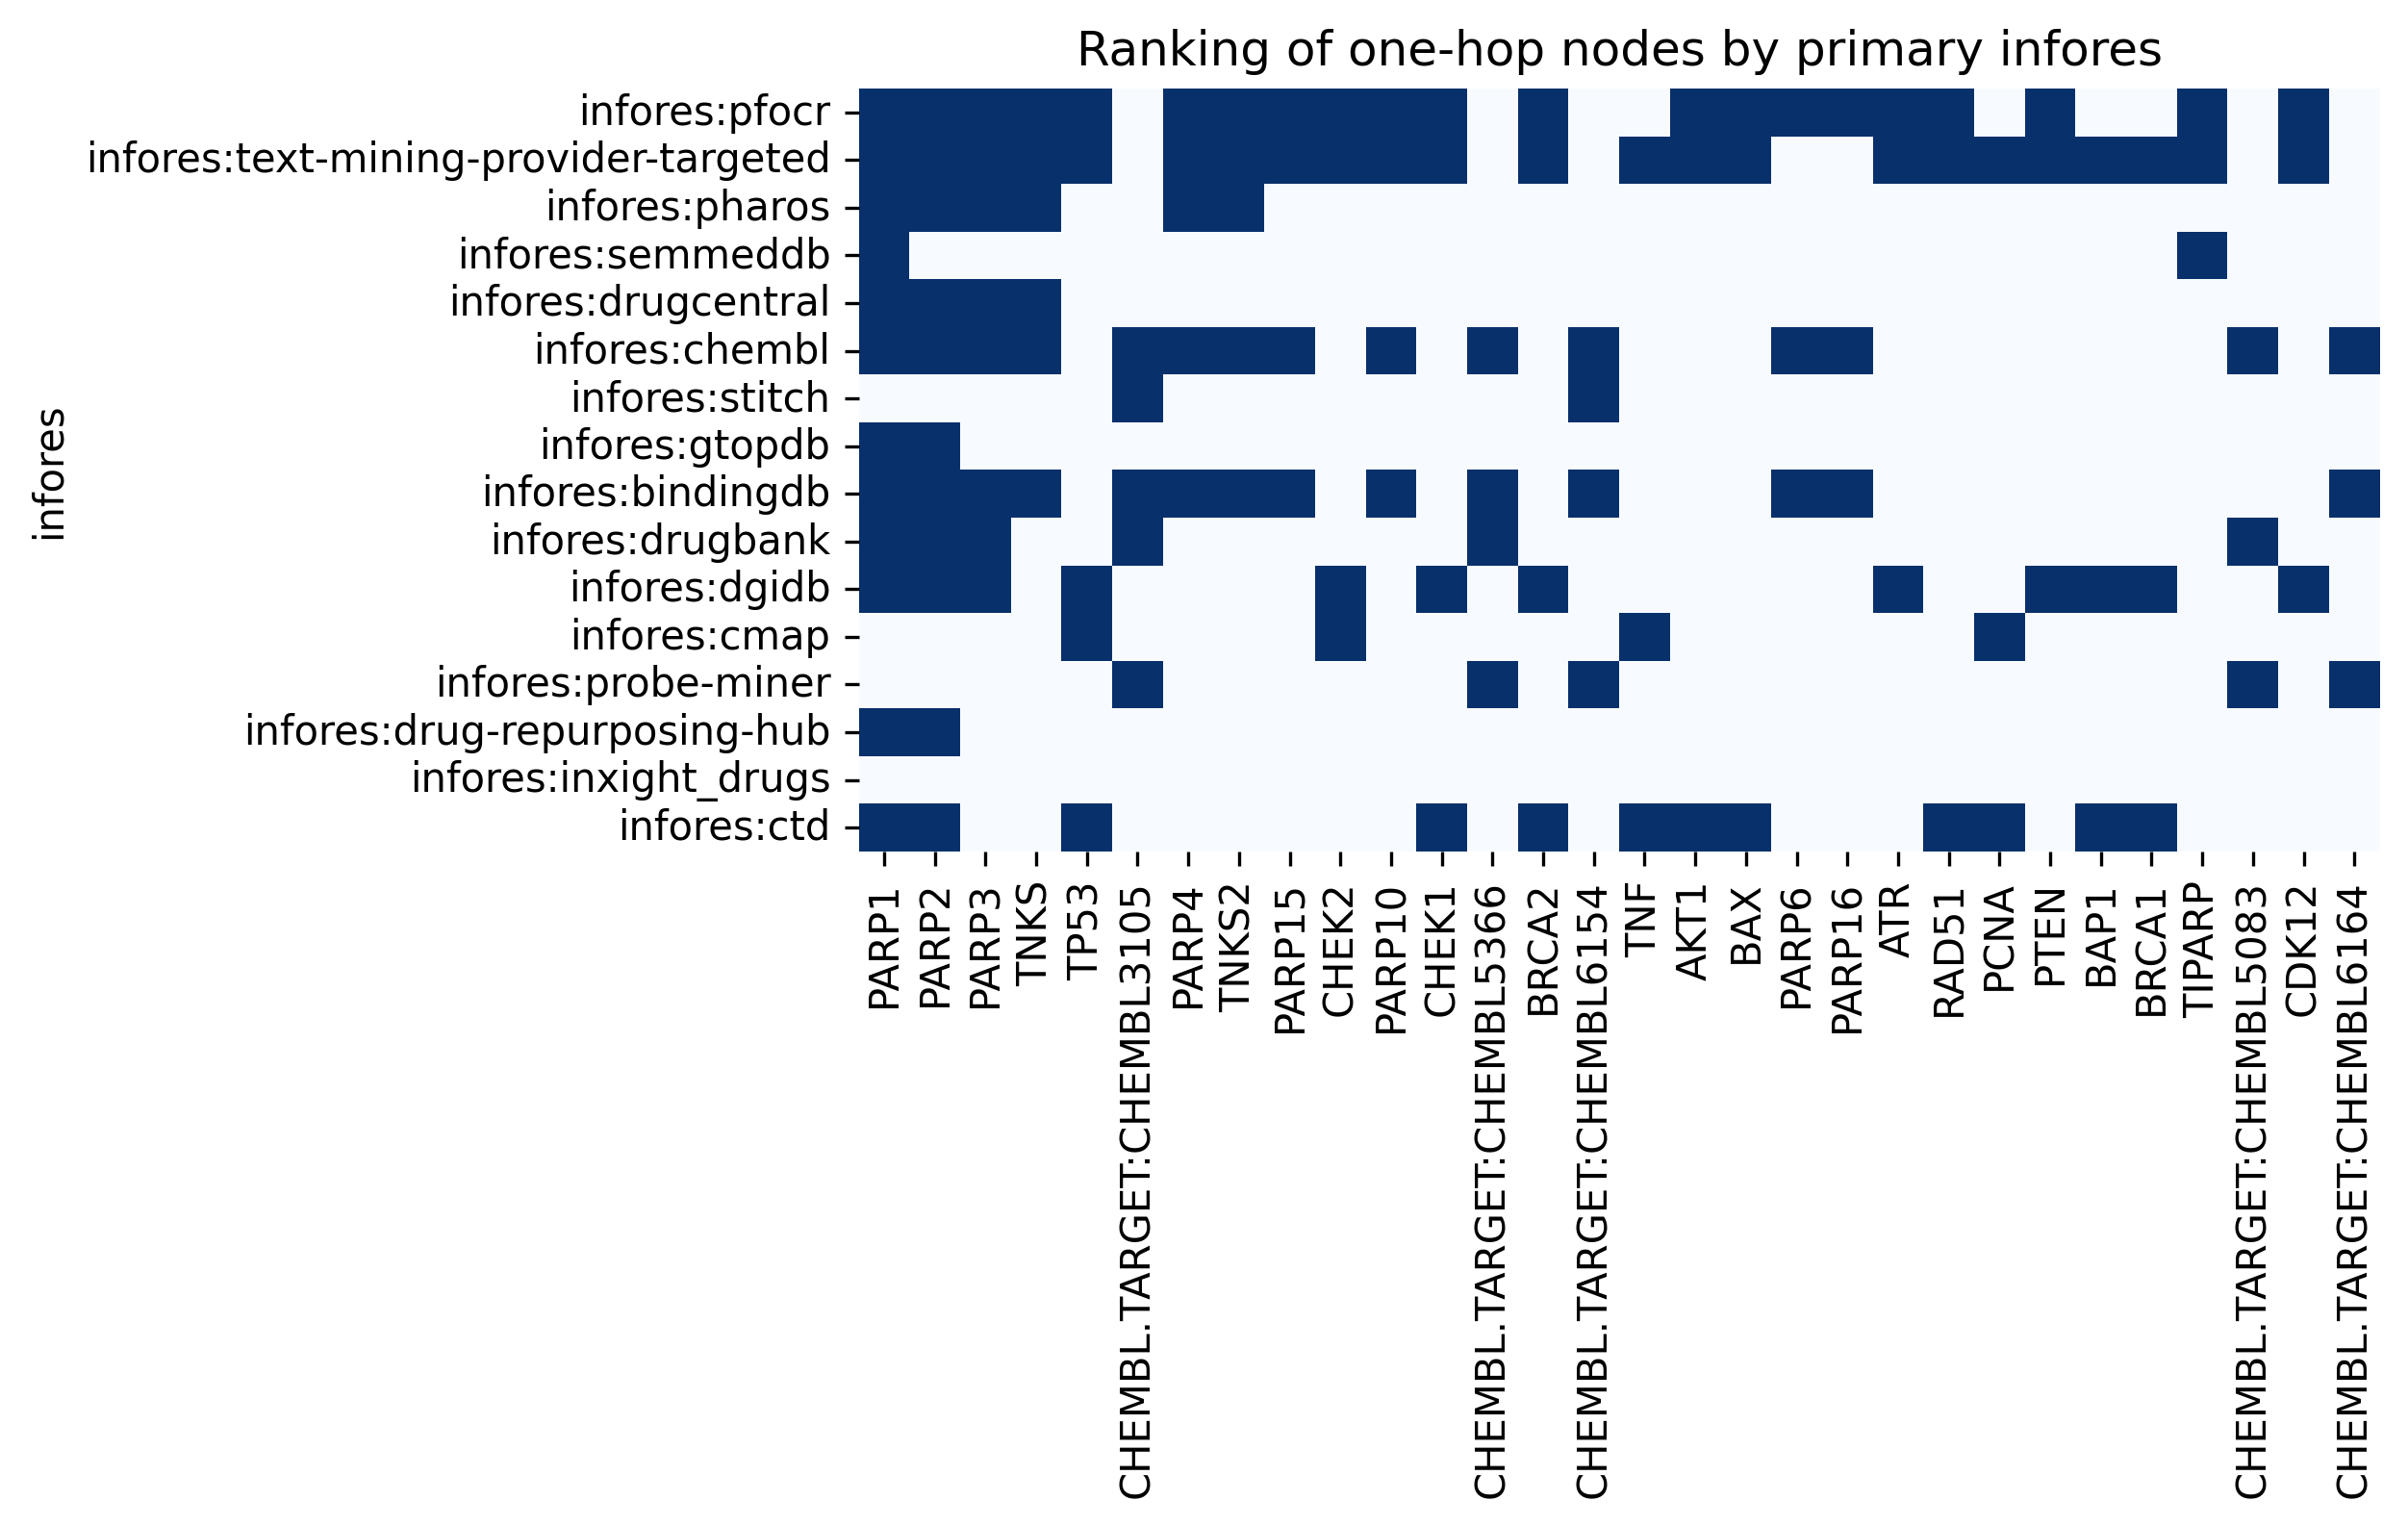

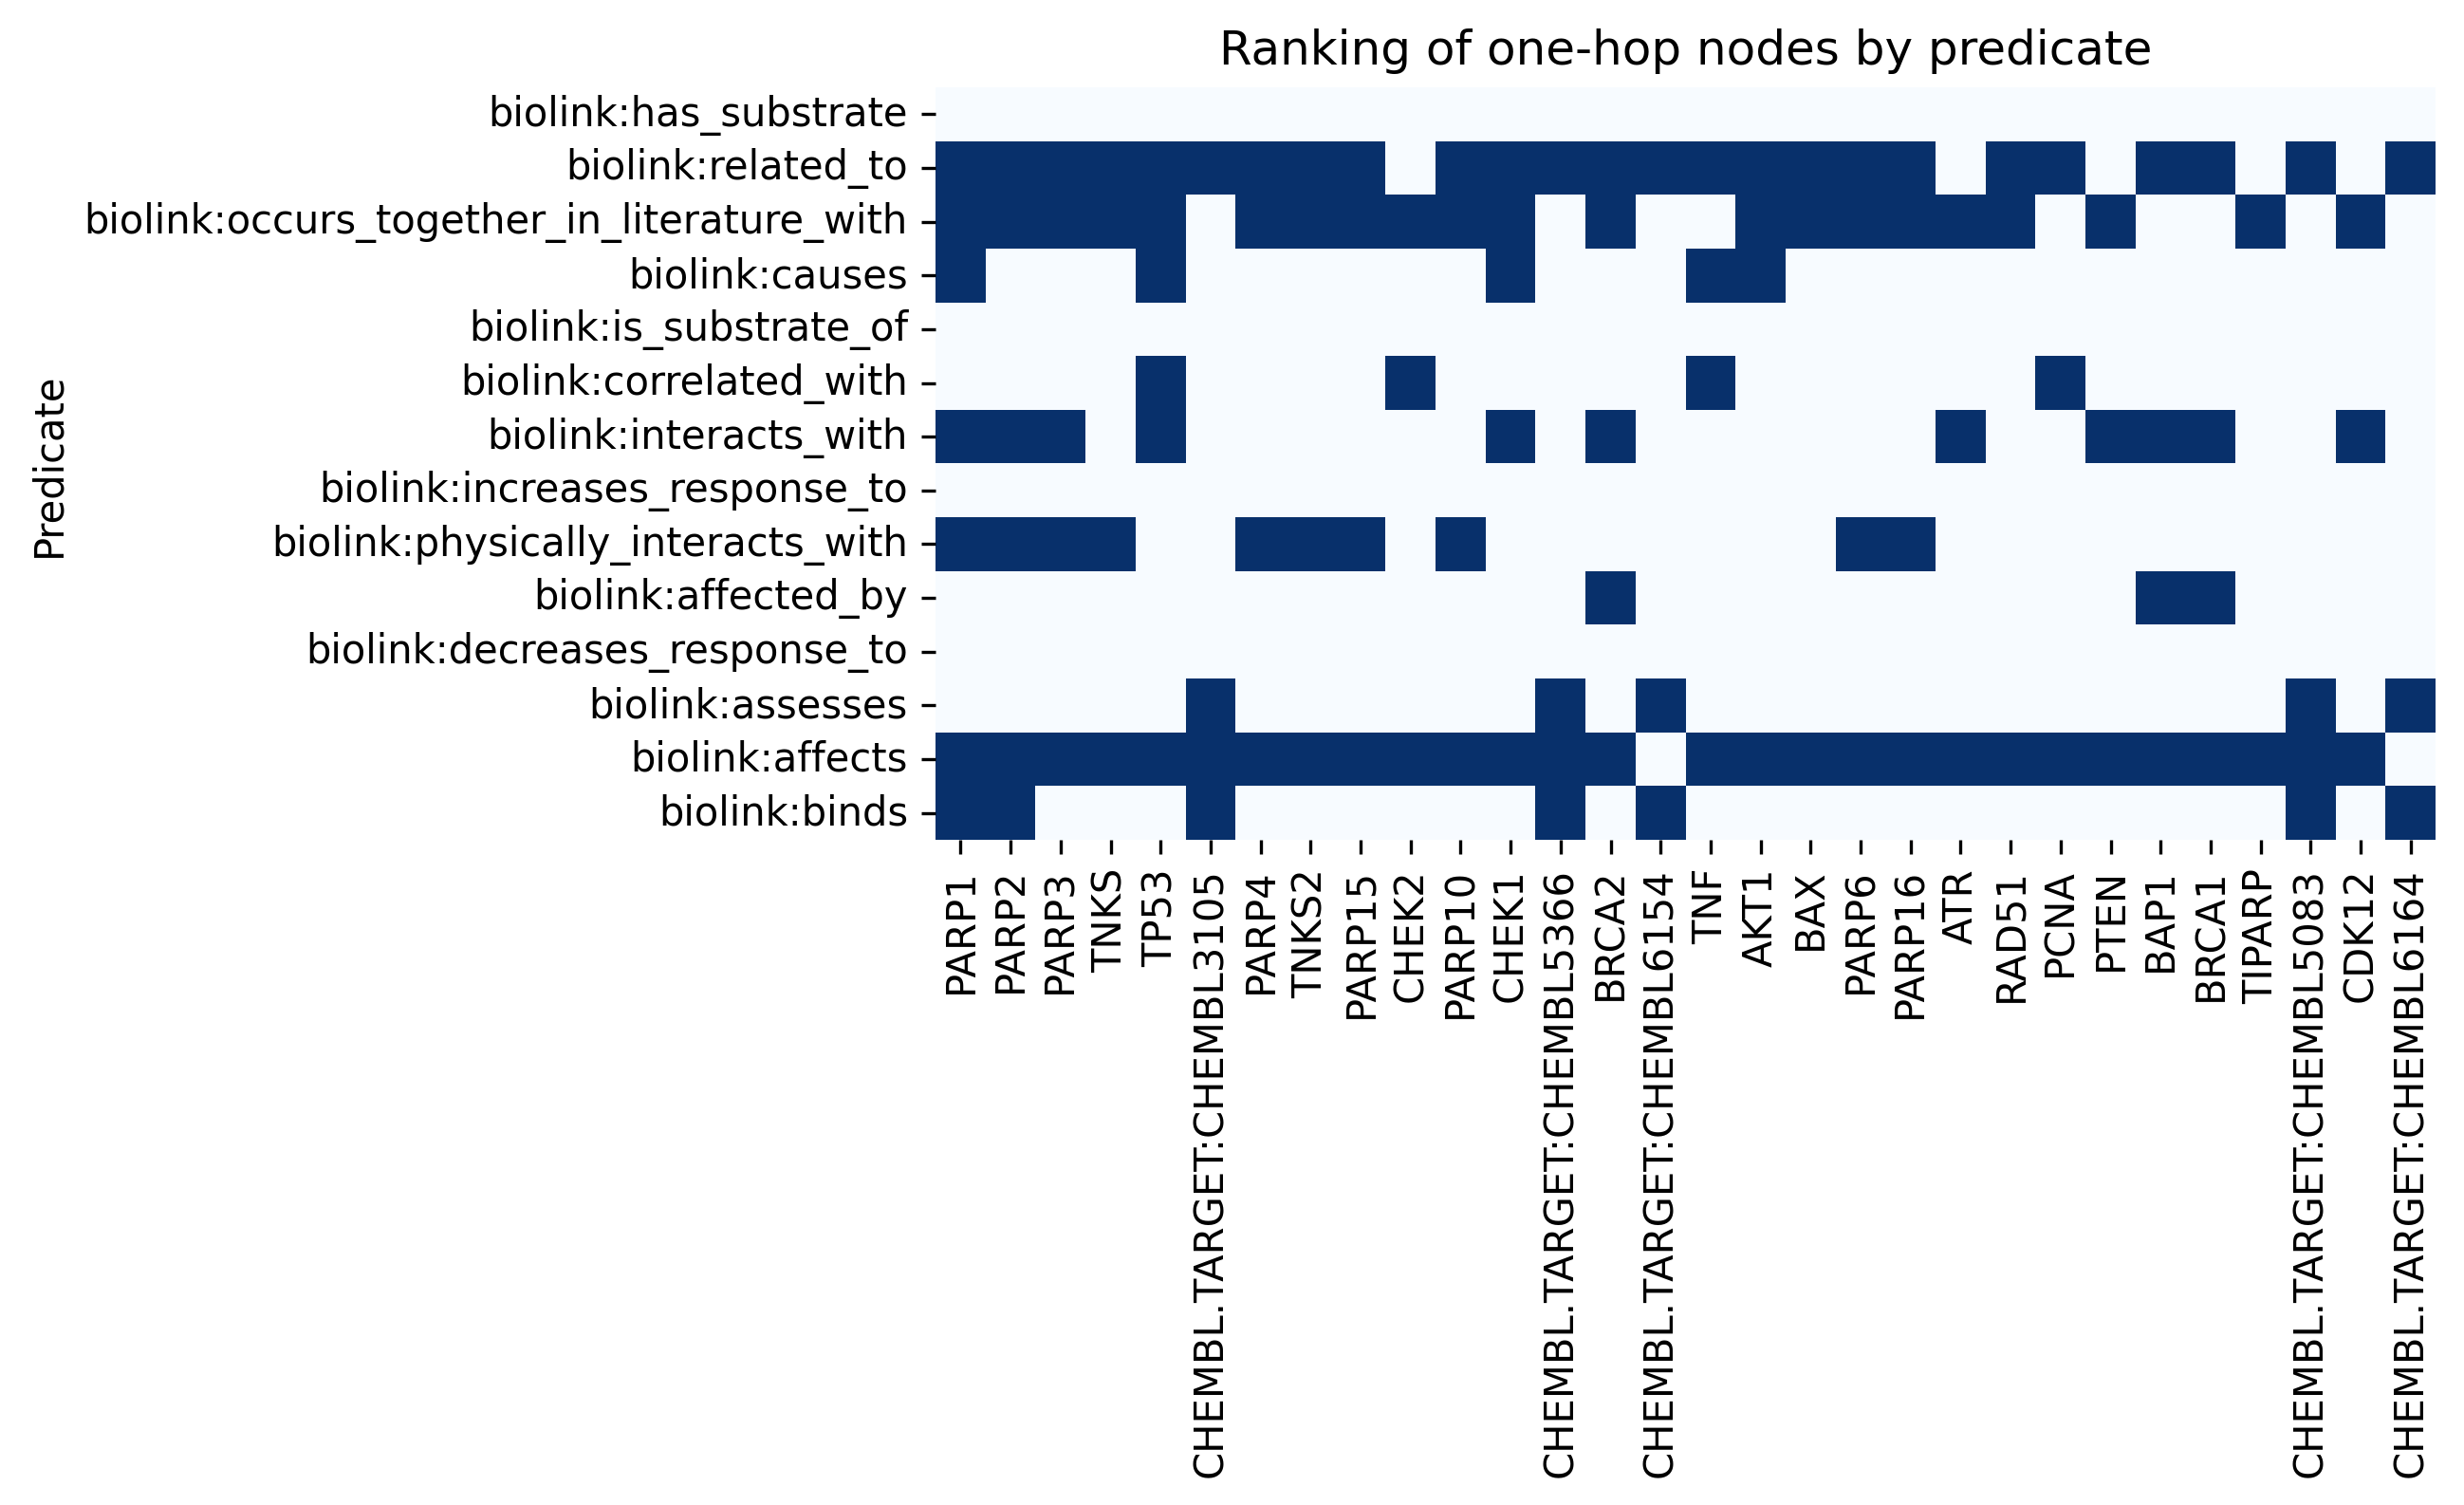

In [10]:
# Step 13: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores2, result_parsed2, num_of_nodes = 30, 
                                 input_query = input_node3_id,
                                 fontsize = 10,
                                 title_fontsize=12)

In [11]:
possible_paths = len(set(result_ranked_by_primary_infores['output_node']).intersection(set(result_ranked_by_primary_infores2['output_node'])))
print("Number of possible paths: ", possible_paths)


Number of possible paths:  142


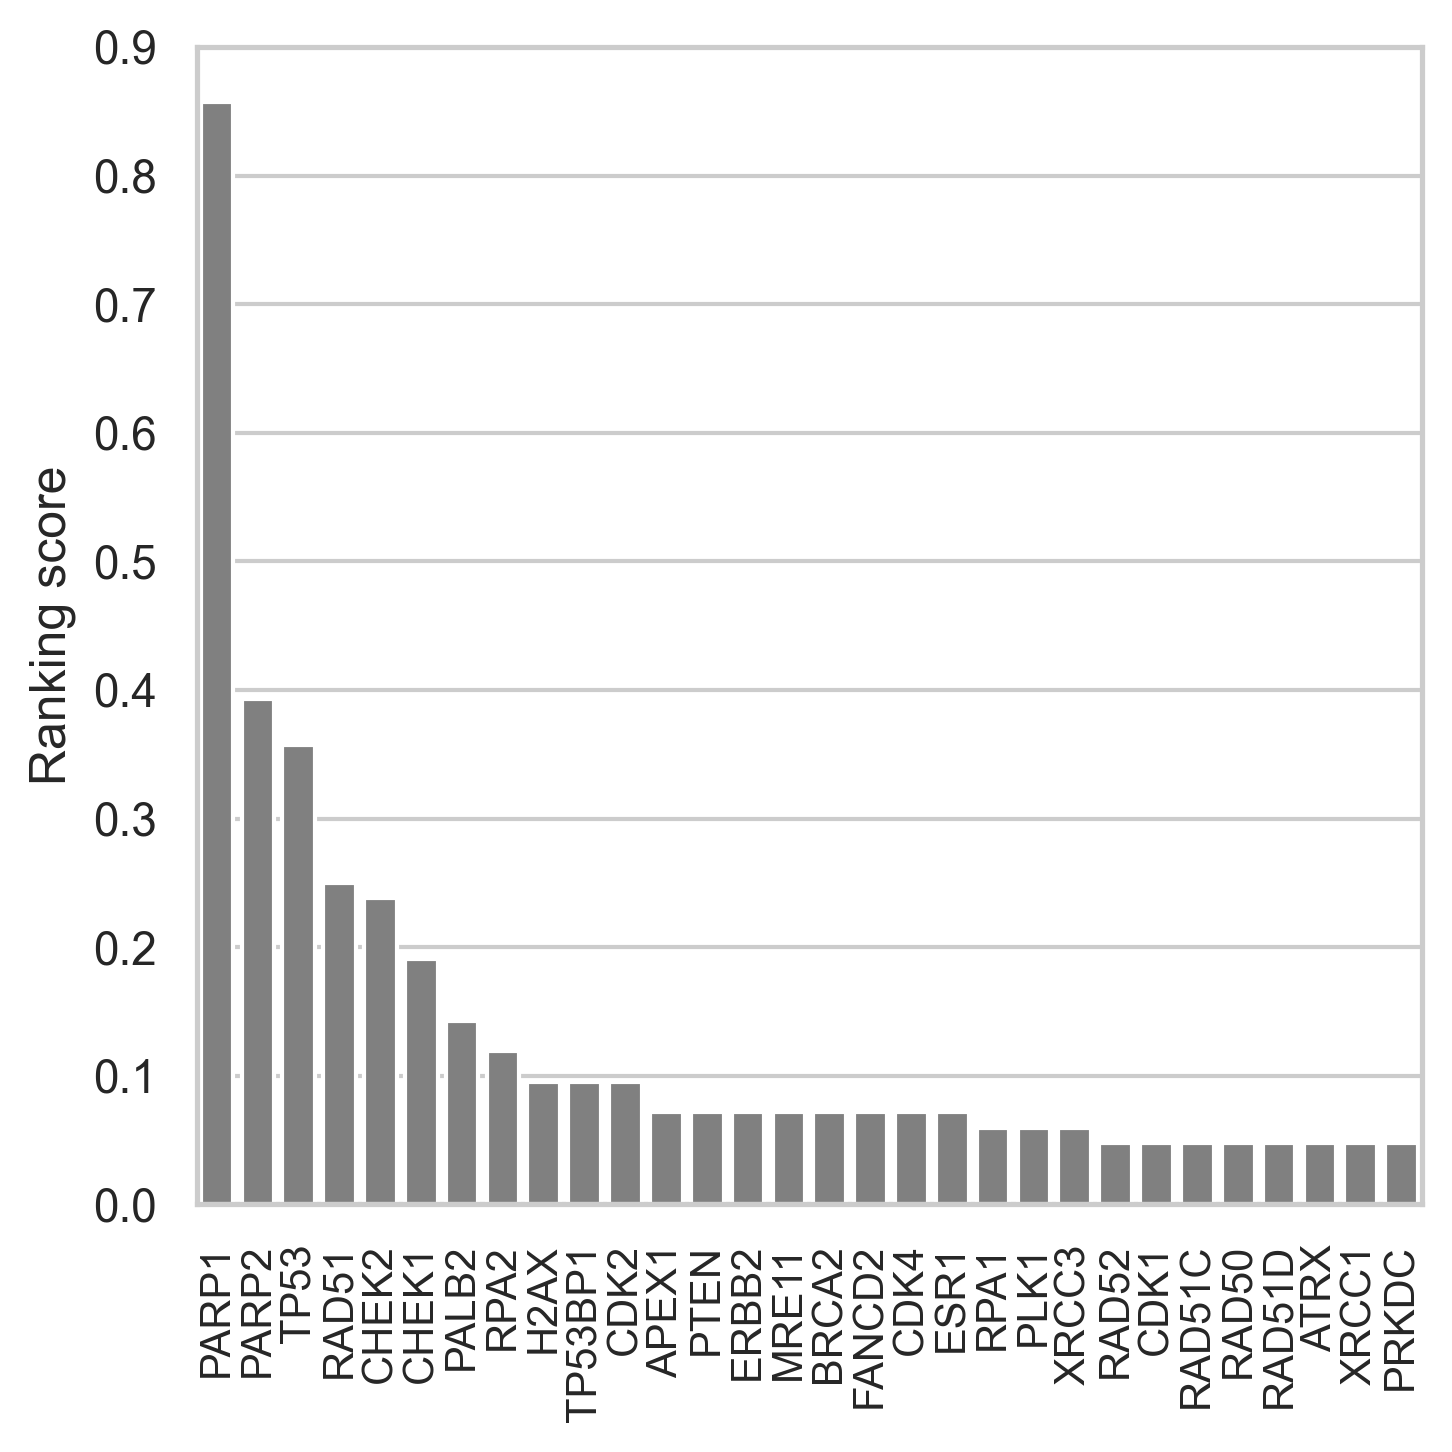

,score
PARP1,0.857143
PARP2,0.392857
TP53,0.357143
RAD51,0.250000
CHEK2,0.238095
...,...
SPATA2,0.011905
TGDS,0.011905
BRCA1,0.011905
TYR,0.011905


In [12]:
TCT.merge_ranking_by_number_of_infores(result_ranked_by_primary_infores, result_ranked_by_primary_infores2, 
                                       top_n = 30,
                                       fontsize=10,
                                       title_fontsize=12,)

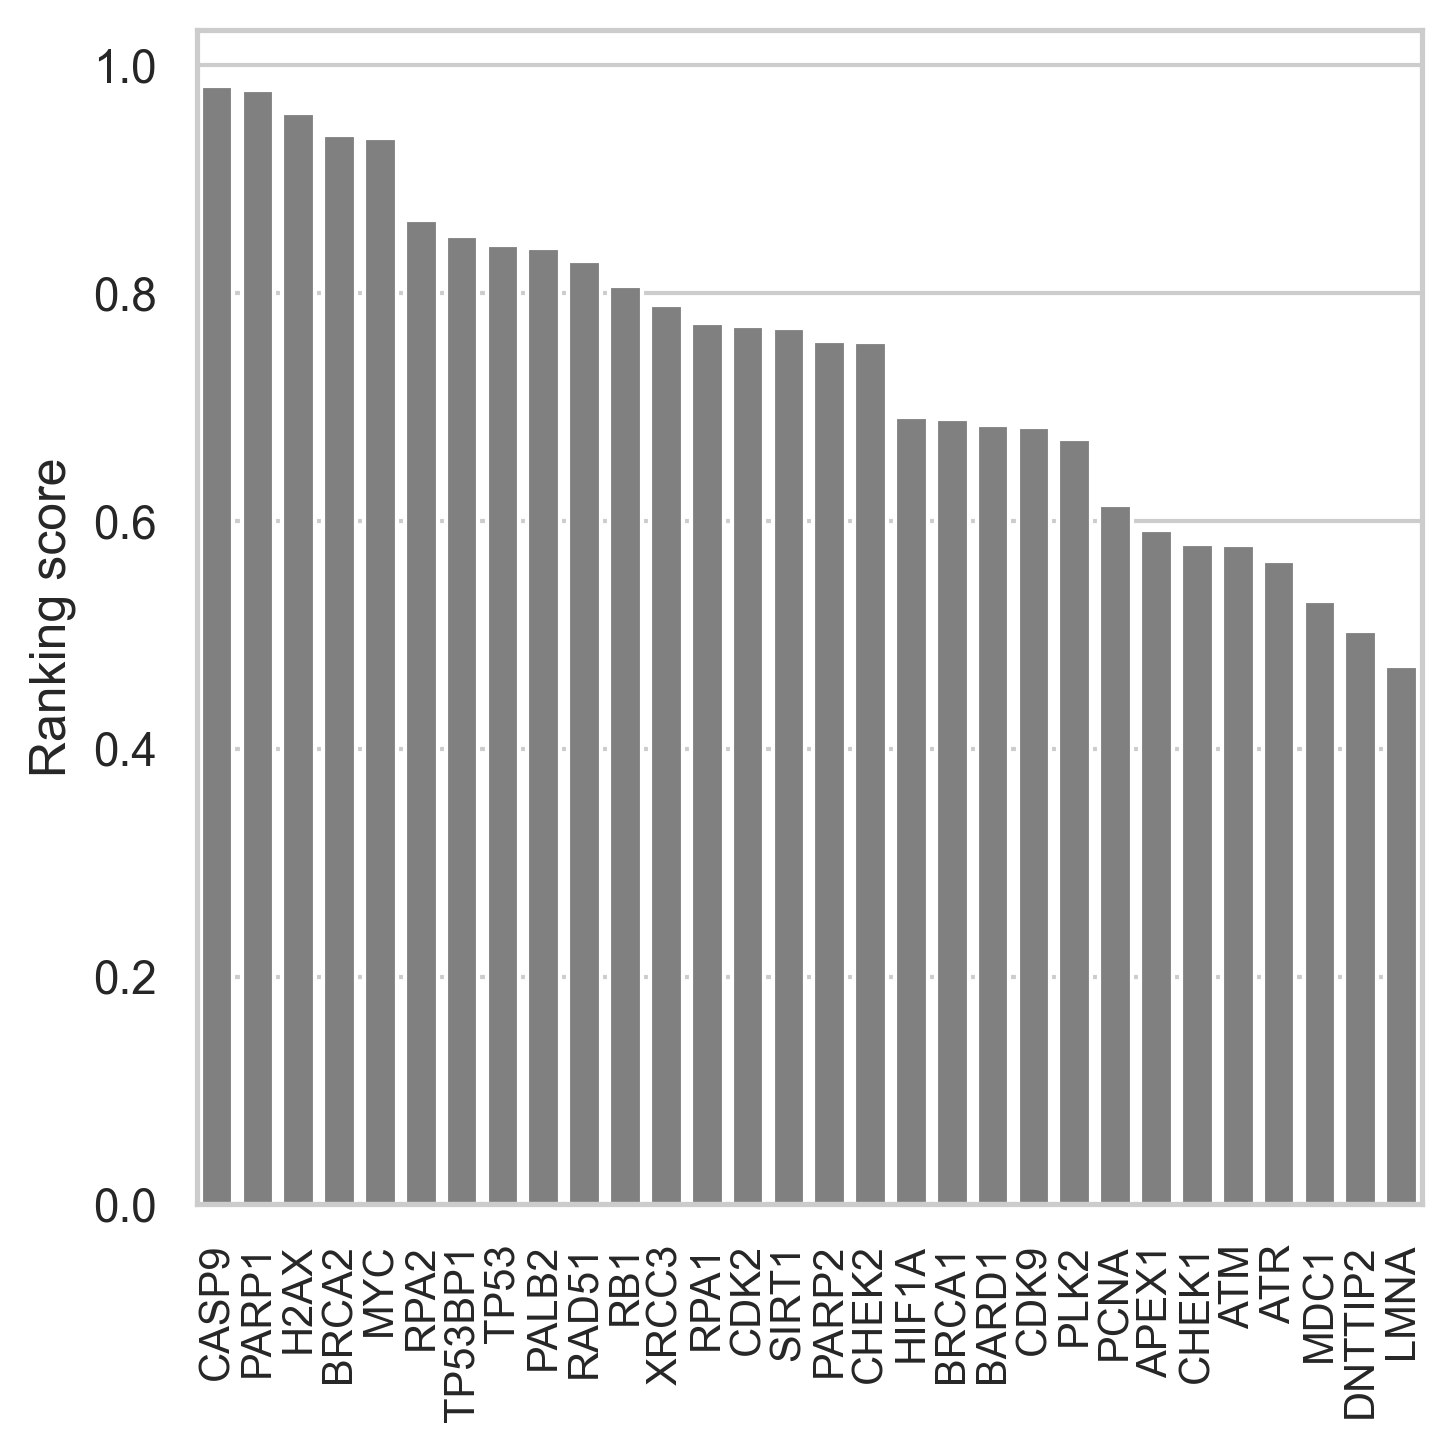

,output_node,score
CASP9,NCBIGene:842,0.982052
PARP1,NCBIGene:142,0.978198
H2AX,NCBIGene:3014,0.958001
BRCA2,NCBIGene:675,0.938947
MYC,NCBIGene:4609,0.936049
...,...,...
RTEL1,NCBIGene:51750,0.008371
POLE3,NCBIGene:54107,0.007893
AR,NCBIGene:367,0.006325
MLH1,NCBIGene:4292,0.002983


In [13]:
TCT.merge_by_ranking_index(result_ranked_by_primary_infores,
                           result_ranked_by_primary_infores2, 
                           top_n=30, fontsize=10, 
                           title_fontsize=12)

In [14]:
TCT.visulize_path(input_node1_id, TCT.get_curie("PARP1"), input_node3_id, result, result2)

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

,Subject,Object,Predicates,Subject_name,Object_name
0,NCBIGene:675,NCBIGene:142,affects::infores:ctd,BRCA2,PARP1
1,NCBIGene:675,NCBIGene:142,causes::infores:ctd,BRCA2,PARP1
2,NCBIGene:675,NCBIGene:142,genetically_interacts_with::infores:biogrid,BRCA2,PARP1
3,NCBIGene:675,NCBIGene:142,regulates::infores:text-mining-provider-targeted,BRCA2,PARP1
4,NCBIGene:675,NCBIGene:142,regulated_by::infores:text-mining-provider-tar...,BRCA2,PARP1
7,NCBIGene:675,NCBIGene:142,affects::infores:semmeddb,BRCA2,PARP1
8,NCBIGene:675,NCBIGene:142,related_to::infores:string,BRCA2,PARP1
9,NCBIGene:675,NCBIGene:142,interacts_with::infores:monarchinitiative,BRCA2,PARP1
15,PUBCHEM.COMPOUND:23725625,NCBIGene:142,affects::infores:gtopdb,Olaparib,PARP1
16,PUBCHEM.COMPOUND:23725625,NCBIGene:142,affects::infores:ctd,Olaparib,PARP1
